In [1]:
#one day i may move the functionality to start and monitor servers into this document, 
# but for now, start up everything with helao_interface.py before using this code
import requests
import json
from matplotlib import pyplot
url = "http://192.168.31.114:13380"
#url = "http://127.0.0.1:13380"
import time
import ipywidgets
import numpy
import pickle
import asyncio
import websockets
sub_data = [] #holds data sent to the notebook by the orchestrator

In [22]:
#live data routines
#loop is websocket connection to receive data from the orchestrator
#update plot live plots this data as it comes in
#init_history_plot and load_figure are subroutines of update_plot
#much of this is adapted from https://stackoverflow.com/questions/68918341/live-update-several-plots-in-jupyter-notebook


uri = "ws://127.0.0.1:13374/ws"

async def loop(var_x,var_y): # non-blocking coroutine, updates data source
    async with websockets.connect(uri) as ws:
        while True:
            new_data = await ws.recv()
            new_data = json.loads(new_data)
            if not isinstance(new_data,float):
                sub_data.append(new_data)
                update_plot(var_x,var_y)

def update_plot(var_x,var_y):
    with plot_wrapper:
        fig, axs = load_figure(template_fig)
        plot_wrapper.clear_output(wait=True)
        for i in range(len(axs)):
            print(data[var_x[i]][0] for data in sub_data])
            axs[i].plot([data[var_x[i]][0] for data in sub_data],[data[var_y[i]][0] for data in sub_data])
        pyplot.show()

### i need to start plotting of the data from index x
### 3 plots instaed of 1
        
def init_history_plot(var_x,var_y):
    """
    Create plot template (dump)
    
    Returns: pickled str
    """
    fig, axs = pyplot.subplots(len(var_x),1)
    dat = pickle.dumps(fig)
    pyplot.close()
    return dat


def load_figure(dump):
    """
    Load Figure from dump
    
    Returns: (Figure, Axes)
    """
    # https://github.com/ipython/ipykernel/issues/231
    import ipykernel.pylab.backend_inline as back_inline
    import matplotlib.backends.backend_agg as back_agg
    back_inline.new_figure_manager_given_figure = back_agg.new_figure_manager_given_figure
    figure = pickle.loads(dump)
    # https://github.com/matplotlib/matplotlib/issues/17627/
    figure._cachedRenderer = None
    return figure, figure.axes

In [142]:
#start
#send this command to initialize the orchestrator for normal single experiments
collectionkey = 'default'
experiment = {'soe':['orchestrator/start'],'params':{'start':{'collectionkey':collectionkey}},'meta':{}}
requests.post(url+'/orchestrator/addExperiment',params = {'experiment':json.dumps(experiment)})

<Response [200]>

In [ ]:
#finish
#send this command to shut down the orchestrator for those
experiment = {'soe':['orchestrator/finish'],'params':{'finish':None},'meta':{}}
requests.post(url+'/orchestrator/addExperiment',params = {'experiment':json.dumps(experiment)})

In [161]:
#emergency functions
thread = 0
requests.post(url+'/orchestrator/clear',params = {'thread':thread})
#requests.post(url+'/orchestrator/kill',params = {'thread':thread})
#requests.post(url+'/orchestrator/pause',params = {'thread':thread})
#requests.post(url+'/orchestrator/resume',params = {'thread':thread})

<Response [200]>

In [23]:
#get data and start a live plotting instance
#this sets up a websocket connection with the orchestrator and begins live plotting of received spectra
%matplotlib inline
asyncio.create_task(loop(["t_s","t_s","Z_real"],["Ewe_V","I_A","Z_imag"]))
plot_wrapper = ipywidgets.Output()
template_fig = init_history_plot(["t_s","t_s","Z_real"],["Ewe_V","I_A","Z_imag"])
plot_interface = ipywidgets.Box(children=[plot_wrapper])
plot_interface

Box(children=(Output(),))

In [9]:
#default plotting method for single spectra
def plot(data,var_x,var_y):
    pyplot.plot([data[var_x][0] for data in sub_data],[data[var_y][0] for data in sub_data])
    pyplot.show()

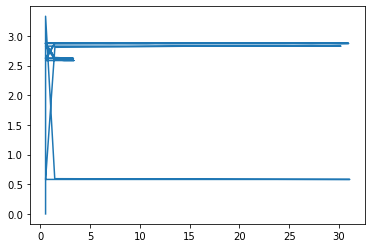

In [19]:
plot(sub_data,"t_s","Ewe_V")

In [13]:
sub_data

[{'t_s': [0.5160000007599592],
  'freq': [[1000.0]],
  'Ewe_V': [0.0],
  'Ach_V': [0.0],
  'Z_real': [[5960.91786135023]],
  'Z_imag': [[3064.5765319917123]],
  'phase': [[27.20821793606856]],
  'modulus': [[6702.5495947585905]],
  'I_A': [0.0]},
 {'t_s': [0.5160000007599592],
  'freq': [0.0],
  'Ewe_V': [3.3319091796875],
  'Ach_V': [0.0],
  'Z_real': [0.0],
  'Z_imag': [0.0],
  'phase': [0.0],
  'modulus': [0.0],
  'I_A': [1.5258789062499999e-10]},
 {'t_s': [1.4379999991506338],
  'freq': [0.0],
  'Ewe_V': [0.5938720703125],
  'Ach_V': [0.0],
  'Z_real': [0.0],
  'Z_imag': [0.0],
  'phase': [0.0],
  'modulus': [0.0],
  'I_A': [1.5258789062499999e-10]},
 {'t_s': [2.375],
  'freq': [0.0],
  'Ewe_V': [0.59326171875],
  'Ach_V': [0.0],
  'Z_real': [0.0],
  'Z_imag': [0.0],
  'phase': [0.0],
  'modulus': [0.0],
  'I_A': [0.0]},
 {'t_s': [3.2819999996572733],
  'freq': [0.0],
  'Ewe_V': [0.59295654296875],
  'Ach_V': [0.0],
  'Z_real': [0.0],
  'Z_imag': [0.0],
  'phase': [0.0],
  'modulus